In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

## Install Library

In [ ]:
# Install necessary libraries
!pip install seaborn joblib scikit-learn matplotlib pandas

## Inport Library

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Load Dataset

In [3]:
# Define file paths
# combine_dataset_path = '/content/drive/My Drive//Machine Learning/Machine-Learning-NutriGoal/data/combine-dataset.csv'
# vegan_dataset_path = '/content/drive/My Drive//Machine Learning/Machine-Learning-NutriGoal/data/Category Diets/vegan.csv'
combine_dataset_path = '../data/combine-dataset.csv'
vegan_dataset_path = '../data/Category Diets/vegan.csv'

# Load datasets
combine_dataset = pd.read_csv(combine_dataset_path)
vegan_dataset = pd.read_csv(vegan_dataset_path)

# Display first few rows
print("Combine Dataset:")
print(combine_dataset.head())

print("\nVegan Dataset:")
print(vegan_dataset.head())

Combine Dataset:
              Name  Calories  Protein(g)  Fat(g)  SaturatedFat(g)  \
0       Cornstarch     381.0        0.26    0.05              0.0   
1     Nuts, pecans     691.0        9.17   71.97              6.2   
2    Eggplant, raw      25.0        0.98    0.18              0.0   
3   Teff, uncooked     367.0       13.30    2.38              0.4   
4  Sherbet, orange     144.0        1.10    2.00              1.2   

   Cholesterol(mg)  Sodium(mg)  Carbohydrate(g)  Fiber(g)  Sugar(g)  
0              0.0         9.0            91.27       0.9      0.00  
1              0.0         0.0            13.86       9.6      3.97  
2              0.0         2.0             5.88       3.0      3.53  
3              0.0        12.0            73.13       8.0      1.84  
4              1.0        46.0            30.40       1.3     24.32  

Vegan Dataset:
  Diet_type                        Recipe_name Cuisine_type  Protein(g)  \
0     vegan                Spiked Vegan Eggnog     americ

In [4]:
# Normalisasi teks: ubah semua huruf pada kolom 'Name' di combine_dataset dan 'Recipe_name' di vegan_dataset menjadi huruf kecil
combine_dataset['Name'] = combine_dataset['Name'].str.lower()  # Normalisasi kolom 'Name' di combine_dataset
vegan_dataset['Recipe_name'] = vegan_dataset['Recipe_name'].str.lower()  # Normalisasi kolom 'Recipe_name' di vegan_dataset

# Menampilkan hasil normalisasi untuk memastikan
print("Combine Dataset setelah normalisasi:")
print(combine_dataset['Name'].head())  # Menampilkan 5 data pertama setelah normalisasi

print("\nVegan Dataset setelah normalisasi:")
print(vegan_dataset['Recipe_name'].head())  # Menampilkan 5 data pertama setelah normalisasi


Combine Dataset setelah normalisasi:
0         cornstarch
1       nuts, pecans
2      eggplant, raw
3     teff, uncooked
4    sherbet, orange
Name: Name, dtype: object

Vegan Dataset setelah normalisasi:
0                  spiked vegan eggnog
1        vegan cucumber tea sandwiches
2           vegan broccoli soup recipe
3    baked vegan mac and cheese recipe
4                         vegan nachos
Name: Recipe_name, dtype: object


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Baca dataset
# combine_dataset_path = '/content/drive/My Drive//Machine Learning/Machine-Learning-NutriGoal/data/combine-dataset.csv'
# vegan_dataset_path = '/content/drive/My Drive//Machine Learning/Machine-Learning-NutriGoal/data/Category Diets/vegan.csv'

# Ambil nama resep dari masing-masing dataset
combine_names = combine_dataset['Name'].astype(str)  # Nama resep dari Combine Dataset
vegan_names = vegan_dataset['Recipe_name'].astype(str)  # Nama resep dari Vegan Dataset

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_vegan = vectorizer.fit_transform(vegan_names)  # TF-IDF Vegan Dataset
tfidf_combine = vectorizer.transform(combine_names)  # TF-IDF Combine Dataset

# Hitung cosine similarity
similarity_scores = cosine_similarity(tfidf_combine, tfidf_vegan)

# Tentukan threshold untuk label "Vegan" atau "Keto"
threshold = 0.7  # Nilai threshold (bisa disesuaikan)
combine_dataset['Diet_Type'] = [
    'Vegan' if score > threshold else 'Keto'
    for score in similarity_scores.max(axis=1)
]

# Simpan hasil ke file baru
# combine_dataset.to_csv("combine_with_diet_type.csv", index=False)

# Tampilkan hasil
print(combine_dataset.head())


              Name  Calories  Protein(g)  Fat(g)  SaturatedFat(g)  \
0       cornstarch     381.0        0.26    0.05              0.0   
1     nuts, pecans     691.0        9.17   71.97              6.2   
2    eggplant, raw      25.0        0.98    0.18              0.0   
3   teff, uncooked     367.0       13.30    2.38              0.4   
4  sherbet, orange     144.0        1.10    2.00              1.2   

   Cholesterol(mg)  Sodium(mg)  Carbohydrate(g)  Fiber(g)  Sugar(g) Diet_Type  
0              0.0         9.0            91.27       0.9      0.00      Keto  
1              0.0         0.0            13.86       9.6      3.97      Keto  
2              0.0         2.0             5.88       3.0      3.53      Keto  
3              0.0        12.0            73.13       8.0      1.84      Keto  
4              1.0        46.0            30.40       1.3     24.32      Keto  


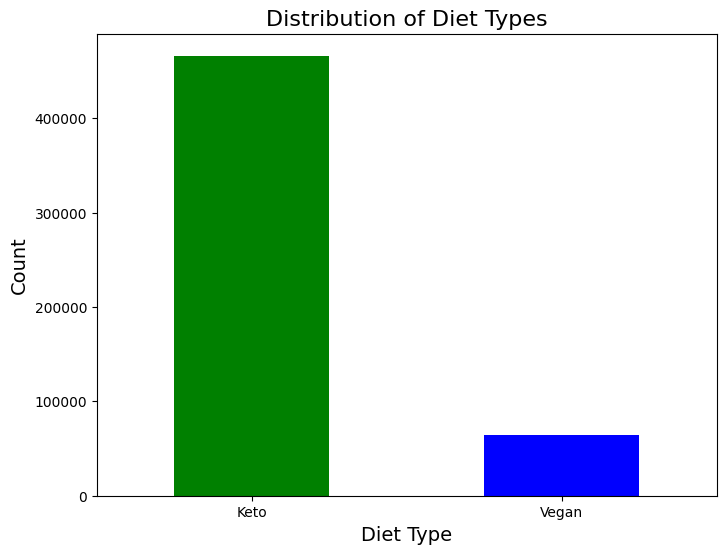

In [6]:
# Hitung distribusi Diet_Type
diet_counts = combine_dataset['Diet_Type'].value_counts()

# Plot distribusi menggunakan Matplotlib
plt.figure(figsize=(8, 6))
diet_counts.plot(kind='bar', color=['green', 'blue'])
plt.title('Distribution of Diet Types', fontsize=16)
plt.xlabel('Diet Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [7]:
# Hitung jumlah masing-masing tipe diet
diet_counts = combine_dataset['Diet_Type'].value_counts()

# Tampilkan hasil
print(diet_counts)


Diet_Type
Keto     466134
Vegan     63903
Name: count, dtype: int64


In [8]:

# combine_dataset.to_csv('../data/combine-dataset-kategori.csv', index=False)


In [9]:
import pandas as pd

# Memuat dataset yang sudah diimpor
combine_data = pd.read_csv('../data/combine-dataset-kategori.csv')

# Fungsi untuk menampilkan pilihan berdasarkan preferensi user
def recommend_diet():
    # Tampilkan pilihan diet
    print("Silakan pilih preferensi diet Anda:")
    print("1. Vegan")
    print("2. Keto")

    # Input dari pengguna
    choice = input("Masukkan pilihan diet Anda (1/2): ")

    # Validasi input
    if choice == '1':
        selected_diet = 'Vegan'
    elif choice == '2':
        selected_diet = 'Keto'
    else:
        print("Pilihan tidak valid. Pilih 1 untuk Vegan atau 2 untuk Keto.")
        return

    # Filter data berdasarkan diet yang dipilih
    recommended_recipes = combine_data[combine_data['Diet_Type'] == selected_diet]

    # Tampilkan rekomendasi resep yang sesuai dengan seluruh kolom
    if not recommended_recipes.empty:
        print(f"\nRekomendasi resep dengan diet {selected_diet}:")
        print(recommended_recipes)  # Menampilkan seluruh kolom
    else:
        print(f"\nTidak ada resep dengan diet {selected_diet} yang ditemukan.")

# Panggil fungsi untuk mendapatkan rekomendasi diet
recommend_diet()


Silakan pilih preferensi diet Anda:
1. Vegan
2. Keto

Rekomendasi resep dengan diet Keto:
                                          Name  Calories  Protein(g)  Fat(g)  \
7                            lamb, raw, ground     282.0       16.56   23.41   
8                            cheese, camembert     300.0       19.80   24.26   
14                       chicken, boiled, feet     215.0       19.40   14.60   
15                       quail, raw, meat only     134.0       21.76    4.53   
19                      salami, turkey, cooked     172.0       19.20    9.21   
...                                        ...       ...         ...     ...   
530015                 holiday lobster newberg    1035.9       80.40   75.00   
530017    christmas peanut butter kiss cookies     119.3        2.80    4.80   
530028          amazing ground beef stroganoff     422.3       27.30   28.60   
530034                   kirshwasser ice cream    1271.3       12.80  117.20   
530035  quick easy asian cucum

In [10]:
# List of non-vegan food names
non_vegan_foods = ['Alligator', 'Alpaca', 'Anchovy', 'Armadillo', 'Bass', 'Bison', 'Buffalo', 'Camel', 'Capon', 'Catfish', 'Chicken', 'Clam', 'Cod', 'Cow', 'Crab', 'Crocodile', 'Cuttlefish', 'Deer', 'Dove', 'Duck', 'Eel', 'Elk', 'Emu', 'Fish', 'Goat', 'Goose', 'Grouse', 'Guinea Pig', 'Hare', 'Horse', 'Kangaroo', 'Llama', 'Lobster', 'Mackerel', 'Moose', 'Mussel', 'Octopus', 'Ostrich', 'Oyster', 'Pangolin', 'Partridge', 'Peafowl', 'Pheasant', 'Pig', 'Pigeon', 'Quail', 'Rabbit', 'Reindeer', 'Salmon', 'Sardine', 'Scallop', 'Sea Urchin', 'Sheep', 'Shrimp', 'Silkie Chicken', 'Snake', 'Squid', 'Tilapia', 'Trout', 'Tuna', 'Turkey', 'Turtle', 'Wild Boar', 'Yak', 'anchovies', 'anchovy paste', 'animal fat', 'bacon', 'beef', 'beef broth', 'beef steak', 'bison', 'black pudding', 'blood sausage', 'boar sausage', 'boiled eggs', 'bone marrow', 'brie', 'brisket', 'burgers', 'butter', 'buttermilk', 'camel meat', 'casein', 'catfish', 'caviar', 'cheddar', 'cheese', 'cheeseburgers', 'chicken', 'chicken breast', 'chicken broth', 'chicken salad', 'chicken thighs', 'chicken wings', 'chorizo', 'clam chowder', 'clams', 'cod', 'cow milk', 'crab', 'crab sticks', 'cream cheese', 'drumsticks', 'duck', 'duck liver', 'eel', 'egg whites', 'egg yolks', 'eggs,prosciutto', 'elk meat', 'emu meat', 'feta', 'fish', 'fish curry', 'fish fillet', 'fish pie', 'fish sauce', 'foie gras', 'fried eggs', 'fried fish', 'frog legs', 'gelatin', 'ghee', 'gizzards', 'goat meat', 'goat milk', 'gouda', 'gravy (meat-based)', 'grilled fish', 'ham', 'honey', 'horse meat', 'hot dogs', 'ice cream', 'jerky', 'kangaroo meat', 'kidney', 'lamb', 'lamb steak', 'lard', 'liver', 'lobster', 'lobster bisque', 'mackerel', 'marshmallows', 'meat loaf', 'meatballs', 'milk', 'mozzarella', 'mussels', 'mutton', 'octopus', 'ostrich meat', 'oyster sauce', 'parmesan', 'pate', 'pepperoni', 'pickled herring', 'pork', 'pork belly', 'pork chops', 'pork cracklings', 'pork rinds', 'pork sausage', 'pork skin', 'pork steak', 'poultry fat', 'rabbit', 'ribs', 'ricotta', 'roasted chicken', 'roasted duck', 'roasted meat', 'roasted turkey', 'roe', 'salami', 'salmon', 'sardines', 'sashimi', 'sausage', 'scallops', 'scrambled eggs', 'seafood chowder', 'seafood paella', 'sheep milk', 'shellfish', 'shrimp', 'smoked fish', 'smoked meats', 'smoked salmon', 'smoked sausages', 'sour cream', 'squid', 'steak', 'suet', 'surimi', 'sushi (non-vegan types)', 'tallow', 'teriyaki salmon', 'tripe', 'trout', 'tuna', 'tuna salad', 'turkey', 'turkey breast', 'turkey legs', 'turkey salad', 'turkey wings', 'veal', 'venison', 'whey protein', 'white pudding', 'whole eggs', 'wild boar', 'yogurt']


# Pastikan kolom 'Name' adalah string dan isi NaN dengan nilai default
combine_dataset['Name'] = combine_dataset['Name'].fillna("").astype(str)

# Add a new column 'Diet_Type' based on Name
combine_dataset['Diet_Type'] = combine_dataset['Name'].apply(
    lambda x: 'Keto' if any(food.lower() in x.lower() for food in non_vegan_foods) else 'Vegan'
)

combine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530037 entries, 0 to 530036
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             530037 non-null  object 
 1   Calories         530037 non-null  float64
 2   Protein(g)       530037 non-null  float64
 3   Fat(g)           530037 non-null  float64
 4   SaturatedFat(g)  530037 non-null  float64
 5   Cholesterol(mg)  530037 non-null  float64
 6   Sodium(mg)       530037 non-null  float64
 7   Carbohydrate(g)  530037 non-null  float64
 8   Fiber(g)         530037 non-null  float64
 9   Sugar(g)         530037 non-null  float64
 10  Diet_Type        530037 non-null  object 
dtypes: float64(9), object(2)
memory usage: 44.5+ MB


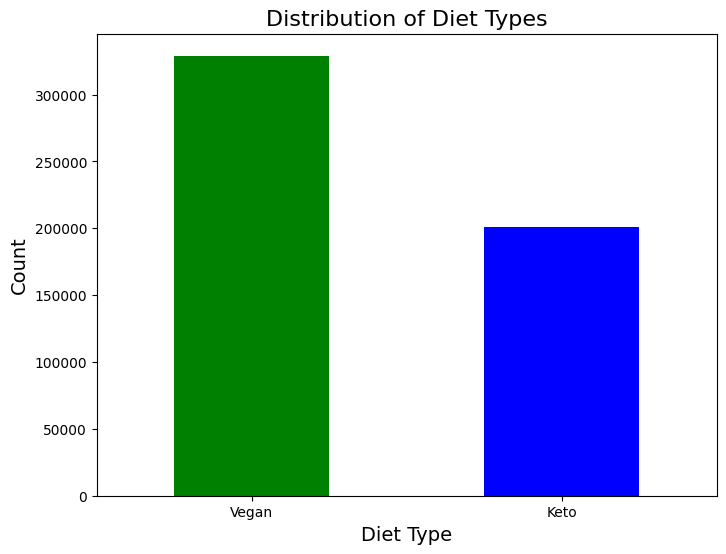

C:\Users\HP\AppData\Local\Temp\ipykernel_15692\2758888008.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combine_dataset, x='Diet_Type', palette='viridis')


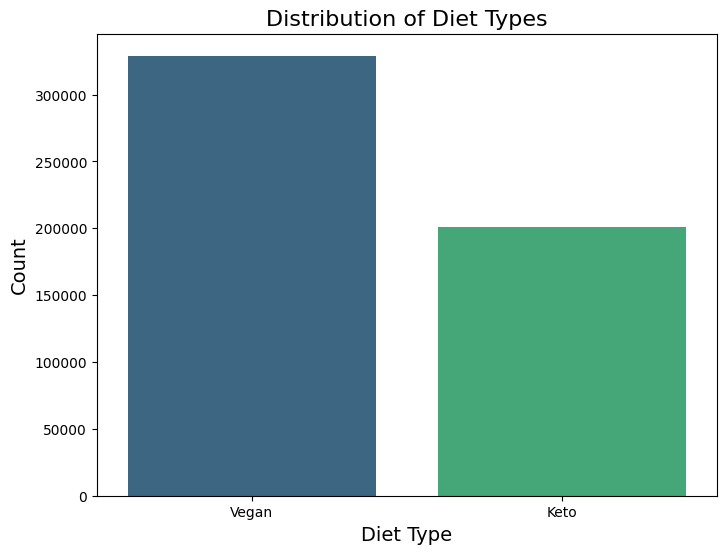

In [11]:
# Hitung distribusi Diet_Type
diet_counts = combine_dataset['Diet_Type'].value_counts()

# Plot distribusi menggunakan Matplotlib
plt.figure(figsize=(8, 6))
diet_counts.plot(kind='bar', color=['green', 'blue'])
plt.title('Distribution of Diet Types', fontsize=16)
plt.xlabel('Diet Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# Plot distribusi menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=combine_dataset, x='Diet_Type', palette='viridis')
plt.title('Distribution of Diet Types', fontsize=16)
plt.xlabel('Diet Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:

combine_dataset.to_csv('../data/combine-dataset-kategori.csv', index=False)
